# Семинар 8. Работа с диаграммами и распределениями

На прошлом занятии мы с вами рассмотрели некоторые возможности библиотеки Matplotlib на примерах визуализации графиков функций вида $y = f(x)$ и построения диаграмм рассеяния. Изученные виды визуализаций хорошо подходят для работы с числовыми данными, построения  визуализаций некоторой апроксимации, или для визуализации некоторых реальных трендов. Например, с помощью функции `plot` можно визуализировать тренд изменения цены интересующей вас акции с течением времени. Однако изученные виды визуализаций не очень хорошо подходят для построения распределений данных. Задача визуализации распределения данных является достаточно важной частью *разведовательного анализа данных*. Во многом именно от этой части зависит качество выдвигаемых гипотез и ход дальнейшего исследования. Следовательно, необходим инструментарий для визуализации распределения данных. Именно с ним мы сегодня и поработаем.

**Необходимые импорты:**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

**Подготовительные шаги:**

In [2]:
plt.style.use("ggplot")
np.random.seed(42)

## Категориальные данные

Нередко данные, с которыми приходится иметь дело, являются категориальными. Т.е. область значений объект выборки ограничена определенными числом допустимых значений. Каждое из допустимых значений олицетворяет собой некоторый класс объект и может быть предствлено, как, например, числом, так и текстом. Категориальные данные очень часто встречаются в различных статистических опросах, например, к числу категориальных данных могут относиться пол или группа крови респондента.

Визуализации распределений категориальных данных, полученной в ходе статистического опроса, является достаточно важной задачей. На основании полученных визуализаций можно выдвинуть различные гипотезы, определить некоторые тренды, которые позволят бизнесу решить актуальные проблемы. Возвращаясь к примеру с полом респондентов, можно сказать, что построение полового распределения респондентов позволит сделать вывод о поле целевой аудитори и скорректировать текущие бизнес стратегии.

Обсудив актуальность этой задачи, перейдем к рассмотрению некоторых инструментов для построения интересующих нас диаграмм.

### plt.pie

Один из возможных способой визуализации категориальных данных - круговая диаграмма. Для построения подобных диаграмм используется функция `plt.pie`. Давайте рассмотрим пример, построим распределение респондентов по полу.

In [3]:
# создадим данные ответов респондентов
genders = np.random.choice(["men", "women"], size=200, p=[0.7, 0.3])

# посчитаем количество респондентов разного пола
labels, counts = np.unique(genders, return_counts=True)

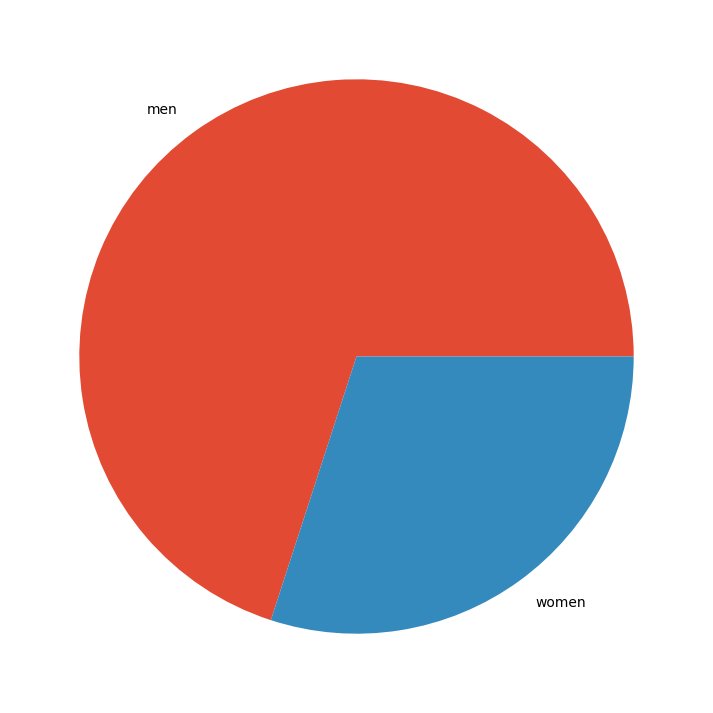

In [4]:
# построим круговую диаграмму
figure, axis = plt.subplots(figsize=(9, 9))

axis.pie(counts, labels=labels)
plt.show()

Как вы видите, чтобы получить информативную круговую диаграмму нам всего лишь потребовалось рассчитать размер каждого сектора круга (количество человек, относящихся к определенной категории), и получить метки классов. Однако данная диаграмма не является эталонной, и вы бы уж точно не хотели бы использовать ее в своих отчетах перед начальством или в качестве слайда в презентации для какой-либо конференции. Давайте рассмотрим дополнительные возможности функции `pie` и улучшим нашу диаграмму.

Начнем с цветов. По умолчанию Matplotlib использует достаточно яркие цвета, давайте сделаем более нежную пастельную цветовую гамму, которая не нпрягала бы глаза зрителей так сильно, как это происходит сейчас. Чтоб сделать это, нам достаточно передать массив цветов в качестве значения аргумента `colors`. Причем количество цветов может не соответствовать числу долей на круге. В случае, если количество цветом меньше, чем число секторов диаграммы, Matplotlib будет циклически перебирать переданные значения, а на диаграмме окажутся сектора с одинаковыми цветами. В случае, если количество цветов больше, чем количество секторов, Matplotlib будет использовать первые $N$ цветов, где $N$ - число секторов.

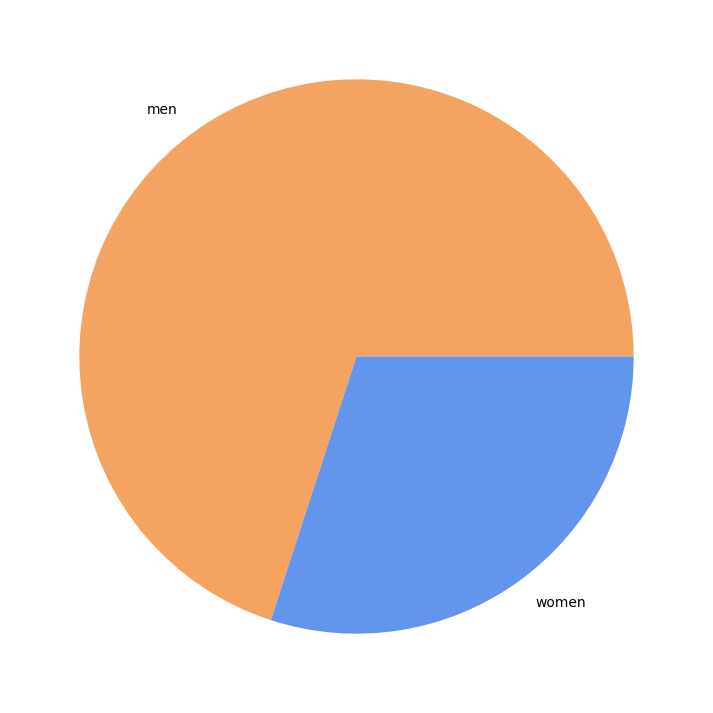

In [5]:
figure, axis = plt.subplots(figsize=(9, 9))

axis.pie(counts, labels=labels, colors=["sandybrown", "cornflowerblue"])
plt.show()

Теперь цвета не такие яркие, и нам легче смотреть на построенную диаграмму. Однако к области стыка секторов из-за контрастности цветов глазам все равно приходится непростою Давайте создадим пространство между секторами, сместив их немного от центра круга, и как следствие, друг от друга. За смещение секторов отвечает аргумент `explode`, который принимает значение массива положительных чисел - смещений секторов относительно центра. Размер массива должен соответствовать числу секторов.

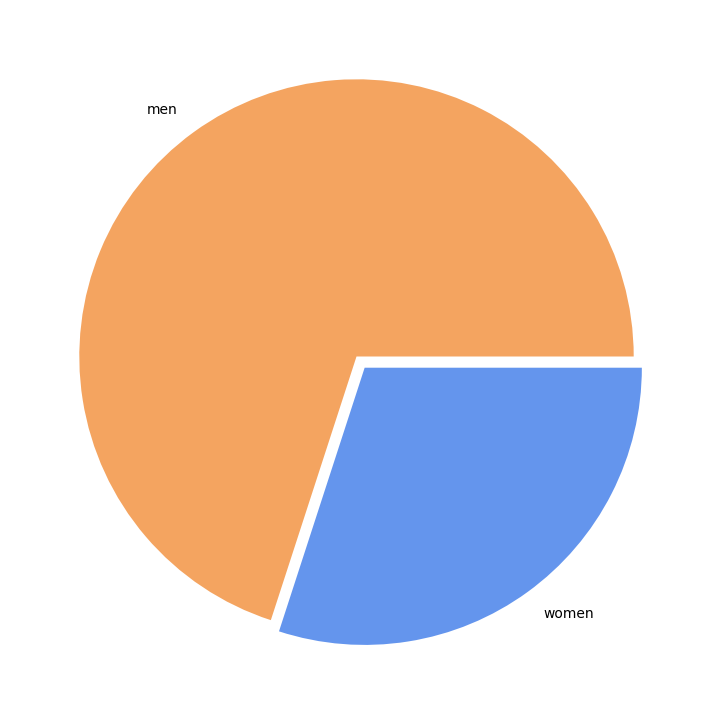

In [6]:
figure, axis = plt.subplots(figsize=(9, 9))

axis.pie(
    counts,
    explode=[0, 0.05],
    labels=labels,
    colors=["sandybrown", "cornflowerblue"],
)
plt.show()

Добавим еще одну модификацию, которая сделает нашу диаграмму привлекательнее - тень.

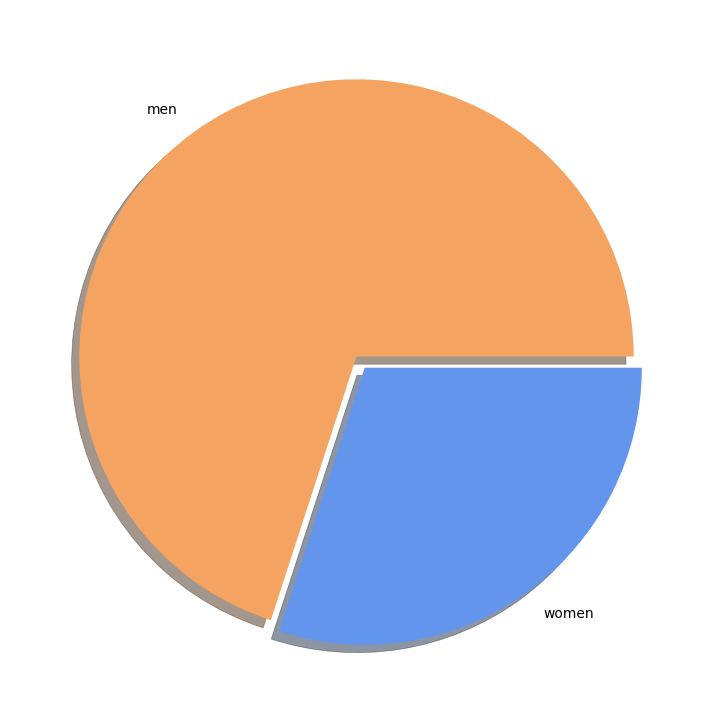

In [7]:
figure, axis = plt.subplots(figsize=(9, 9))

axis.pie(
    counts,
    explode=[0, 0.05],
    labels=labels,
    colors=["sandybrown", "cornflowerblue"],
    shadow=True,
)
plt.show()

Теперь поработаем с текстом. Начнем с того, что вынесем метки секторов в отдельную сущность - легенду. С ней мы познакомились на прошлом занятии. Также добавим название с помощью функции `set_title`.

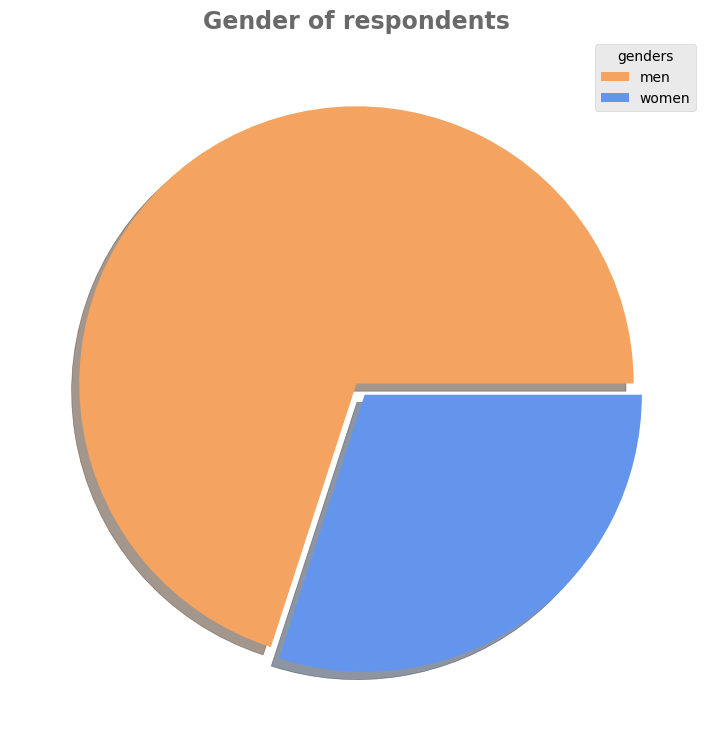

In [8]:
figure, axis = plt.subplots(figsize=(9, 9))

axis.set_title("Gender of respondents", fontsize=17, fontweight="bold", c="dimgray")
wedges, _ = axis.pie(
    counts,
    explode=[0, 0.05],
    colors=["sandybrown", "cornflowerblue"],
    shadow=True,
)
axis.legend(wedges, labels, title="genders")

plt.show()

Обратите внимание, что в этом примере мы не передаем метки явно в сам вызов `pie`, вместо этого, мы сохраняем результат выполнения функции. Поскольку функция возвращет кортеж со списком секторов круговой диаграммы и списком текстов, а для аннотирования нам нужны только сектора, мы сохраняем только массив с ними в переменную `wadges` (англ. *клинья*). После этого, мы передаем в функцию `legend()` явным образом и объекты для аннотирования, и их метки. Также мы подписываем саму легенду, присваивая ей название `genders`. Такой подход к построению легенды может быть полезен в том случае, когда вам нужно четко указать, какие объекты должны быть аннотированы, а какие нет, при этом подобной гибкости не добиться  путем простого использования аргумента label у объекта визулизации. Именно такой случай и был проиллюстрирован, поскольку использование аргумента lables в нашем случае создаст метки в двух местах одновременно - рядом с самими секторами, как это было в предыдущих пример, и в самой легенде.

Сейчас наша диаграмма близка к репрезентативному виду, однако не хватает некоторой дополнительной информации о размере секторов. Например, не лишним будет указать какой процент данных приходится на каждый сектор, или сколько респондентов содержится в каждом из секторов диаграммы. Чтобы добавить подписи для секторов, воспользуемся аргументами `autopct` и `textprops`. Первый аргумент принимает на вход строку для форматирования или функцию форматирования текста. Аргумент функции - число процентов, соответствующее данному сектору. Функция будет вызвана для каждого сектора отдельно. С помощью второго аргумента можно отформатировать текст подписей, настроив размер шрифта, или его цвет.

In [9]:
# создадим вспомогательную функцию форматирования
def convert_percent_to_label_str(
    percent: float, general_amount: int
) -> str:
    amount = int(np.round(percent / 100 * general_amount))
    return f"{amount:d} people\n({percent:.1f}%)"

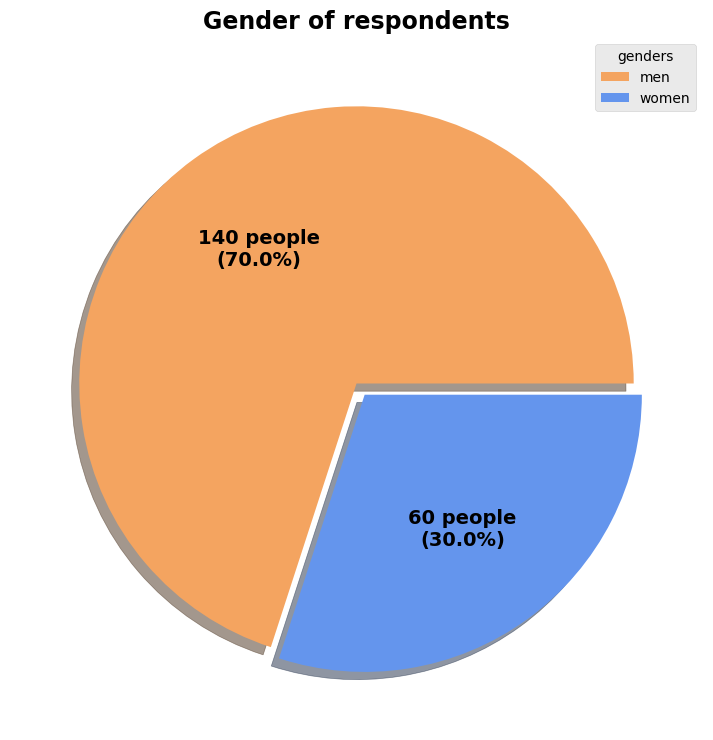

In [10]:
figure, axis = plt.subplots(figsize=(9, 9))

axis.set_title("Gender of respondents", fontsize=17, fontweight="bold", c="k")
wedges, _, _ = axis.pie(
    counts,
    explode=[0, 0.05],
    autopct=lambda pct: convert_percent_to_label_str(pct, genders.size),
    colors=["sandybrown", "cornflowerblue"],
    shadow=True,
    textprops=dict(size=14, weight="bold", color="k"),
)
axis.legend(wedges, labels, title="genders")

plt.show()

На этом базовая настройка круговой диаграммы подходит к концу. Если у вас возникает необходимость более детальной настройки диаграммы, вы всегда можете обратиться к [официальной документации](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html).

### plt.bar

Еще один вид диаграмм, который подходит для визуализации категориальных данных - это столбчатные диаграммы. Давайте также построим столбчатую диаграмму с использованием наших данных о поле респондентов, а потом попытаемся ее улучшить.

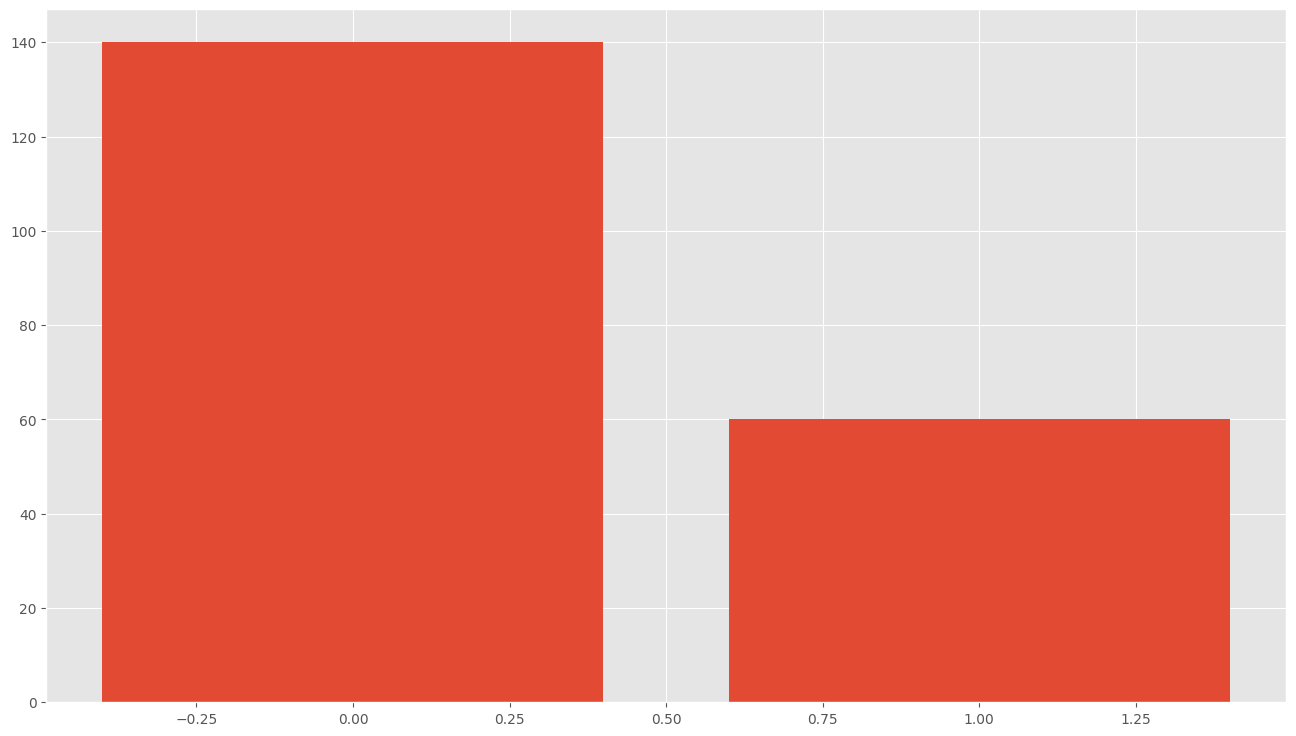

In [11]:
figure, axis = plt.subplots(figsize=(16, 9))

axis.bar(np.arange(counts.size), counts)
plt.show()

В простейшем случае для построения простой столбцатой диаграммы нам достаточно указать расположение столбцов и их высоту. Однако, как и в случае с `plt.pie`, простейшая форма столбчатой диаграммы выглядит не самым лучшим образом для использования в различных отчетах и исследовательских материалах. Давайте исправим это.

Как и в прошлый раз начнем с цвета. В качестве цвета можно указать как одно значение - в этом случае все столбцы будут окрашены в один цвет, так и список значений - соответствующий цвет для каждого столбца. Также укажем цвет контура стобцов с помощью параметра `edgecolor`.

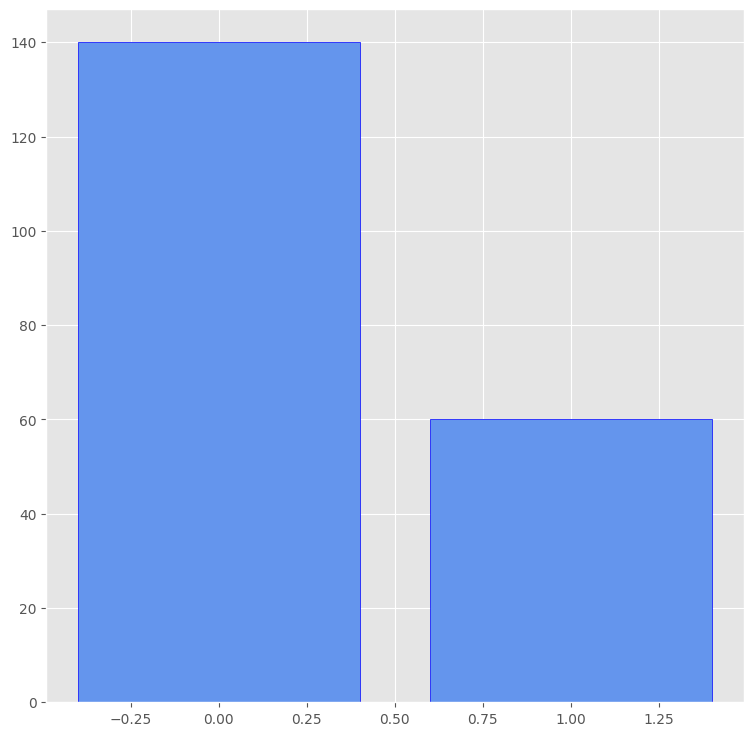

In [12]:
figure, axis = plt.subplots(figsize=(9, 9))

axis.bar(
    np.arange(counts.size),
    counts,
    color="cornflowerblue",
    edgecolor="blue",
)
plt.show()

Обратим внимание, что по умолчанию ширина столбцов равна 0.8 единицам. В нашем случае это слишком много, поэтому столбцы выглядят как слишком широкие прямоугольники. Настроить ширину стобцов можно с помощью параметра `width`. Причем в качестве значения вы можете передать как число с плавающей точкой - в этом случае указанная ширина будет использована для построения всех столбцов, так и список чисел с плавающей точкой, указав ширину каждого столбца по-отдельности. Для консистентности нашей визуализации воспользуемся первым вариантом.

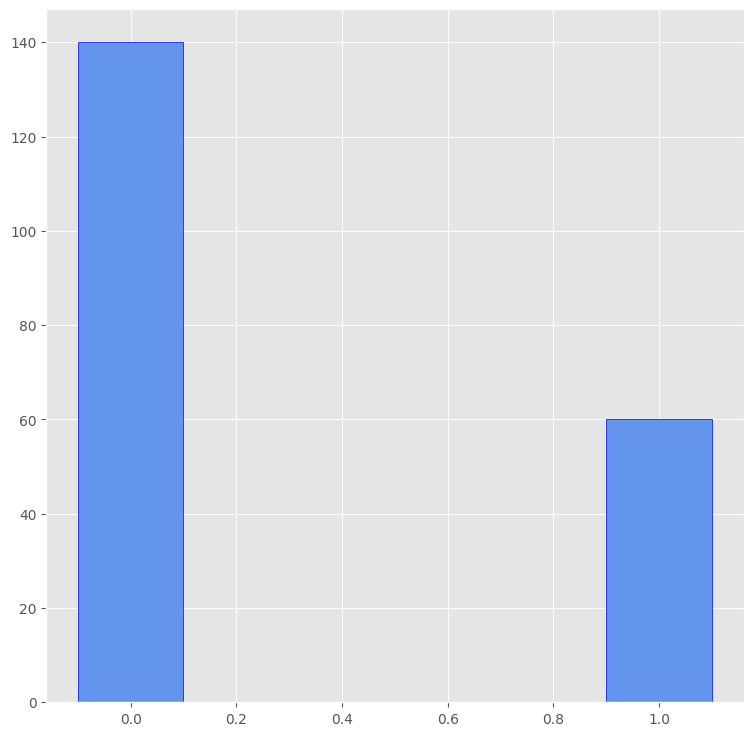

In [13]:
figure, axis = plt.subplots(figsize=(9, 9))

axis.bar(
    np.arange(counts.size),
    counts,
    width=0.2,
    color="cornflowerblue",
    edgecolor="blue",
)
plt.show()

Теперь остается добавить подписи на наш график. Название, как и в прошлый раз, зададим с помощью функции `set_title`. Для именования столбцов воспользуемся функцией `xticks`, которая позволяет задать отображаемые деления оси абсцисс, а также настроить их метки. Отдельные свойства делений настроим через `tick_params`.

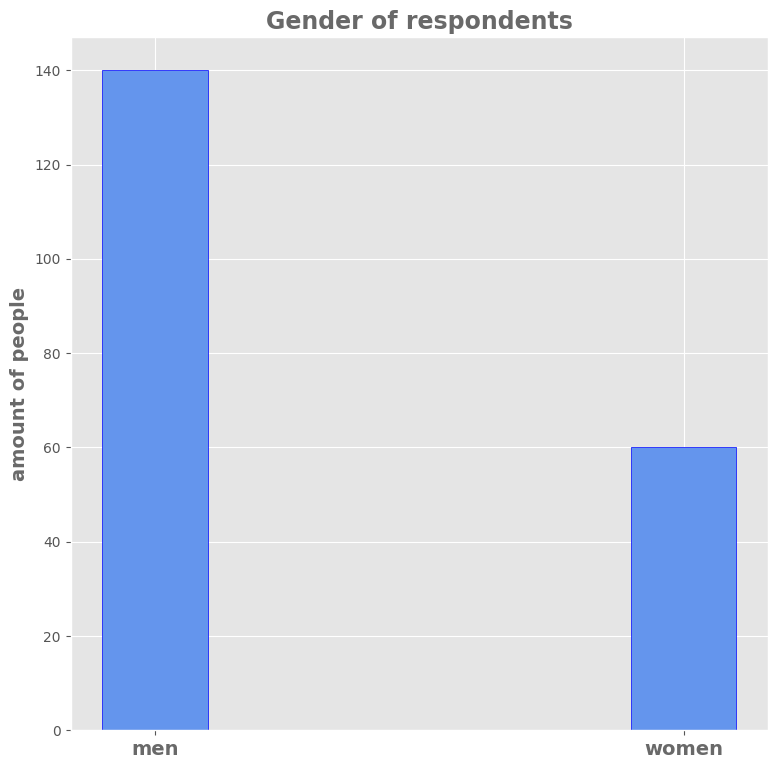

In [14]:
figure, axis = plt.subplots(figsize=(9, 9))

axis.set_title("Gender of respondents", fontsize=17, fontweight="bold", c="dimgray")
axis.set_ylabel("amount of people", fontsize=14, fontweight="bold", c="dimgray")
axis.set_xticks(
    np.arange(labels.size),
    labels=labels,
    weight="bold",
)
axis.tick_params(axis="x", labelsize=14, labelcolor="dimgray")

axis.bar(
    np.arange(counts.size),
    counts,
    width=0.2,
    color="cornflowerblue",
    edgecolor="blue",
)
plt.show()

Более детальные настройки столбчатой диаграммы можно изучить [здесь](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

## Задача 1

Представим, что вы работает аналитиком данных в некоторой медицинской компании, которая занимается изготовлением кардио имплантов. Одно из изделей, которое планируется выпускаться серийно - кардиоиплант, устанавливаемый при митральной недостаточности (неправильное функционирование митрального клапана, при котором возникает обратное движение крови из левого желудочка в левое предсердие во время сокращения желудочков сердца вследствие неполного смыкания створок клапана). Для того, чтобы запустить данное изделие в производство, необходимо убедить инвесторов в эффективности вашего импланта. Для этого были собраны данны о степени митральной недостаточности пациентов до установки пробного кардиоимпланта и после. Данные хранятся в виде следующей структуры в файле `./data/medic_data.json`:
```json
{
    "before": [
        "I",
        "II",
        ...
    ],
    "after": [
        "I",
        "II",
        ...
    ]
}
```

Ваша задача - построить визуализации соотношений количества пациентов в каждой группе митральной недостаточности до установки импланта и после, чтобы включить полученную визуализацию в презентацию для потенциальных инвесторов. Пример ожидаемого результата:

![expected-result](./images/task1_expected.png)

Посмотрите внимательно, на полученную вами диаграмму. Какой вывод об эффективности импланта можно сделать, если стадия I самая безопасная, а стадия IV - самая опасная?

**Необходимые импорты:**

In [15]:
import json

**Решение:**

In [16]:
# ваш код

## Числовые данные

Данные, с которыми приходится работать, не ограничиваются категориальными данными, в их число также входят и числовые данные. Визуализация распределения числовых данных может быть полезна для построения оценки вероятностного распределения, или для идентефикации выбросов в вашей выборки. Рассмотрим некоторые инструменты для визуализации распределений цисловых данных.

### plt.hist

Одним из самых простых инструментов визуализации распределения числовых данных является гистограмма. Гистограмма похожа на столбчатую диаграмму. Обычно столбцы гистограммы имеют одинаковую ширину, соотвутствующую ширине интервала, в который фиксируются попадание данных, высота столбца соответствует количеству данных, попавших в интервал.

В простейшем случае построение гистограммы будет выглядеть следующим образом:

In [17]:
data = np.random.normal(size=1000)

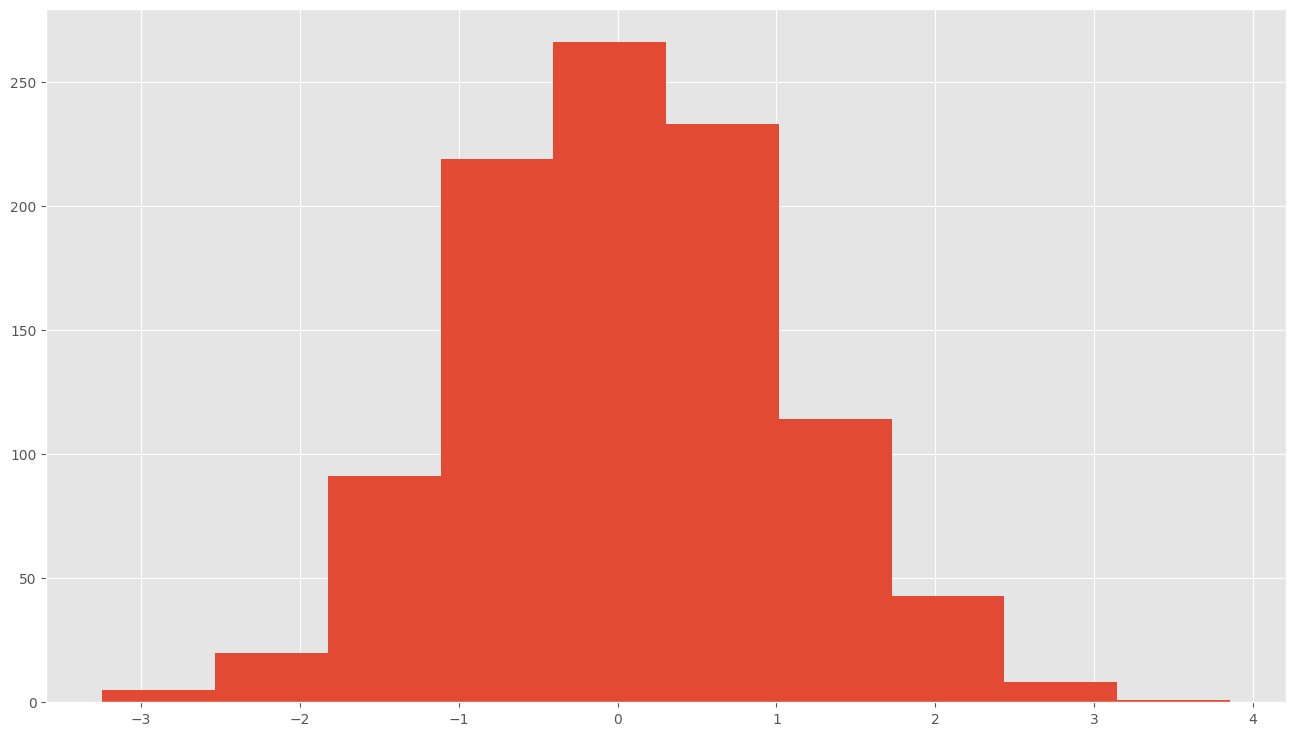

In [18]:
figure, axis = plt.subplots(figsize=(16, 9))

axis.hist(data)
plt.show()

Применим к гистограмме по умолчанию пользовательские настройки цвета, а также увеличим количество интервалов для разбияния до 50.

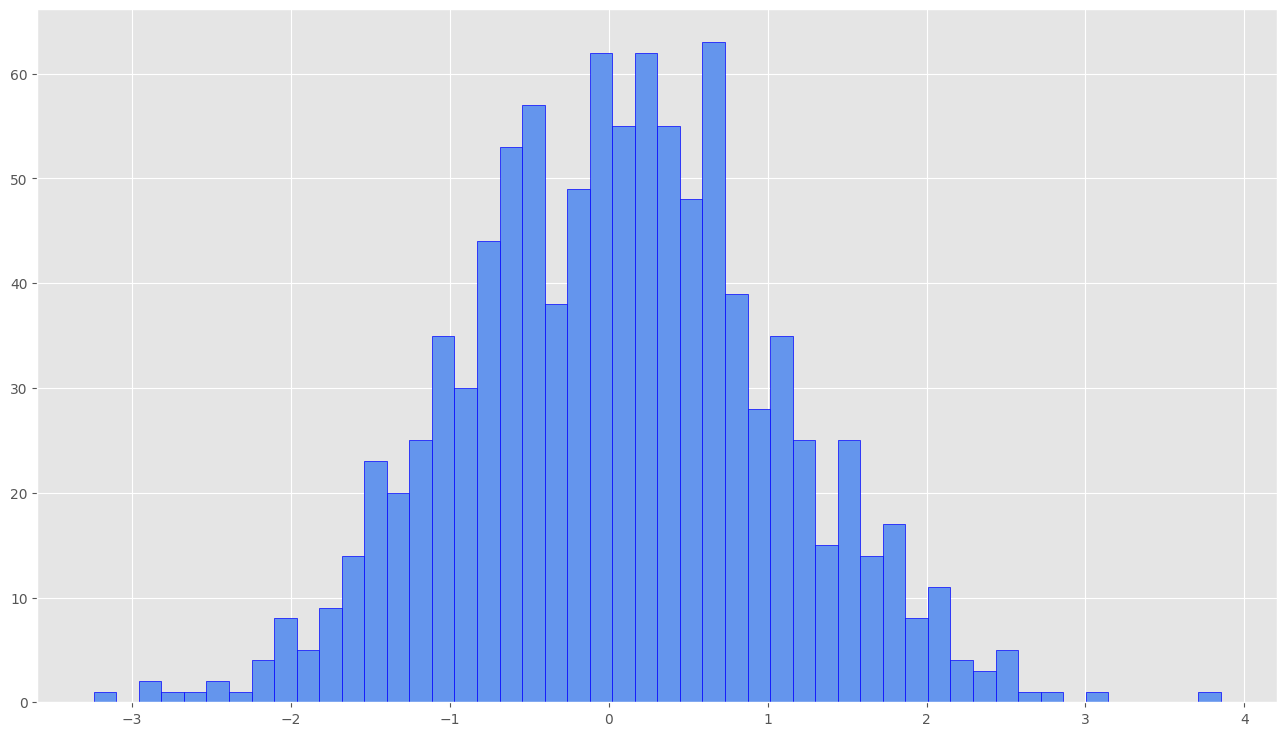

In [19]:
figure, axis = plt.subplots(figsize=(16, 9))

axis.hist(
    data,
    bins=50,
    color="cornflowerblue",
    edgecolor="blue",
)
plt.show()

Как можно видеть по единицам измерения оси ординат, высота столбца измерена в количестве данных, попавших в заданный интервал. В статистическом анализе бывает полезно отнормировать высоту столбца на общее число данных. Тогда полученная гистограмма может выступать в роли плотности вероятностного распределения данных. Для этой цели в функции `hist` есть параметр `density` (англ. *плотность*).

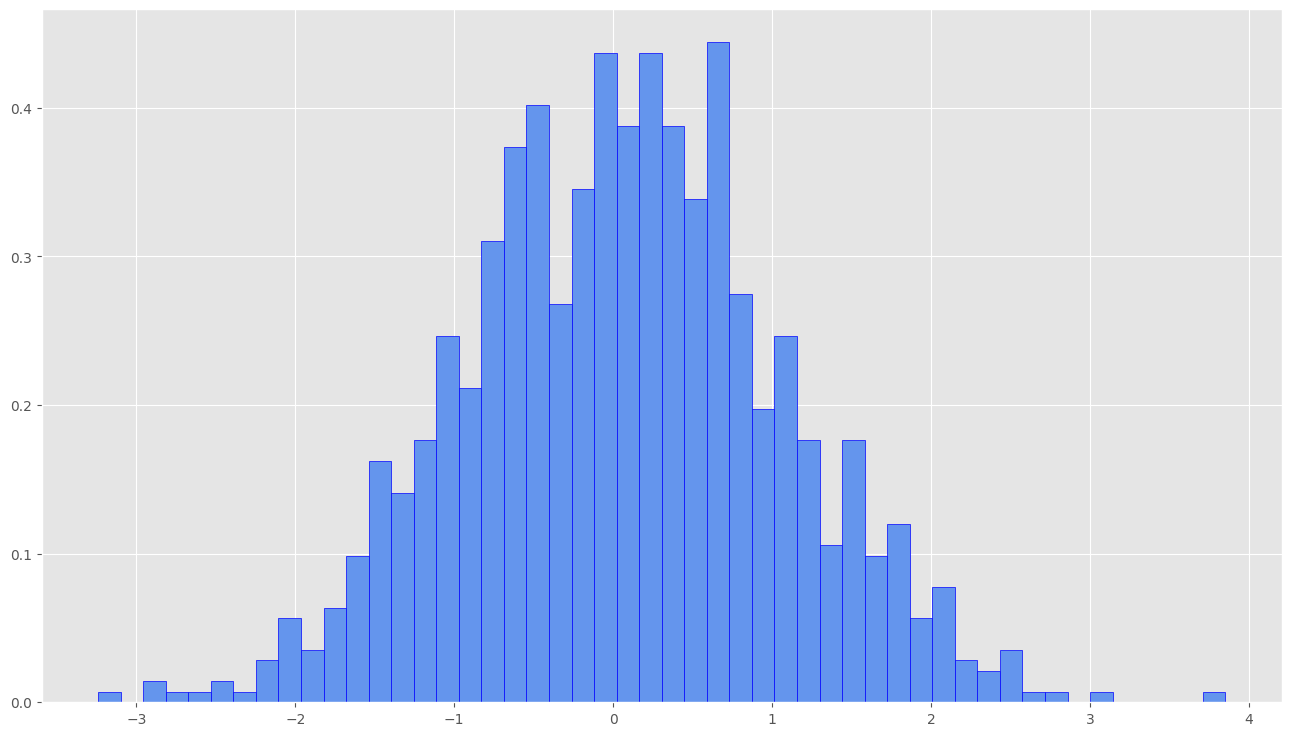

In [20]:
figure, axis = plt.subplots(figsize=(16, 9))

axis.hist(
    data,
    bins=50,
    color="cornflowerblue",
    edgecolor="blue",
    density=True,
)
plt.show()

Также на гистограмму можно визуализировать в виде кумулятивной функции, т.е. высота очередного столбца будет равна сумме высот всех предыдущих столбцов плюс количество данных, попавших в текущий интервал. Эта возможность также может быть использована при эмпирической апроксимации функции распределения вероятностей. Чтобы визулизировать гистограмму данным образом необходимо передать соответствующее булево значение в параметр `cumulative`. 

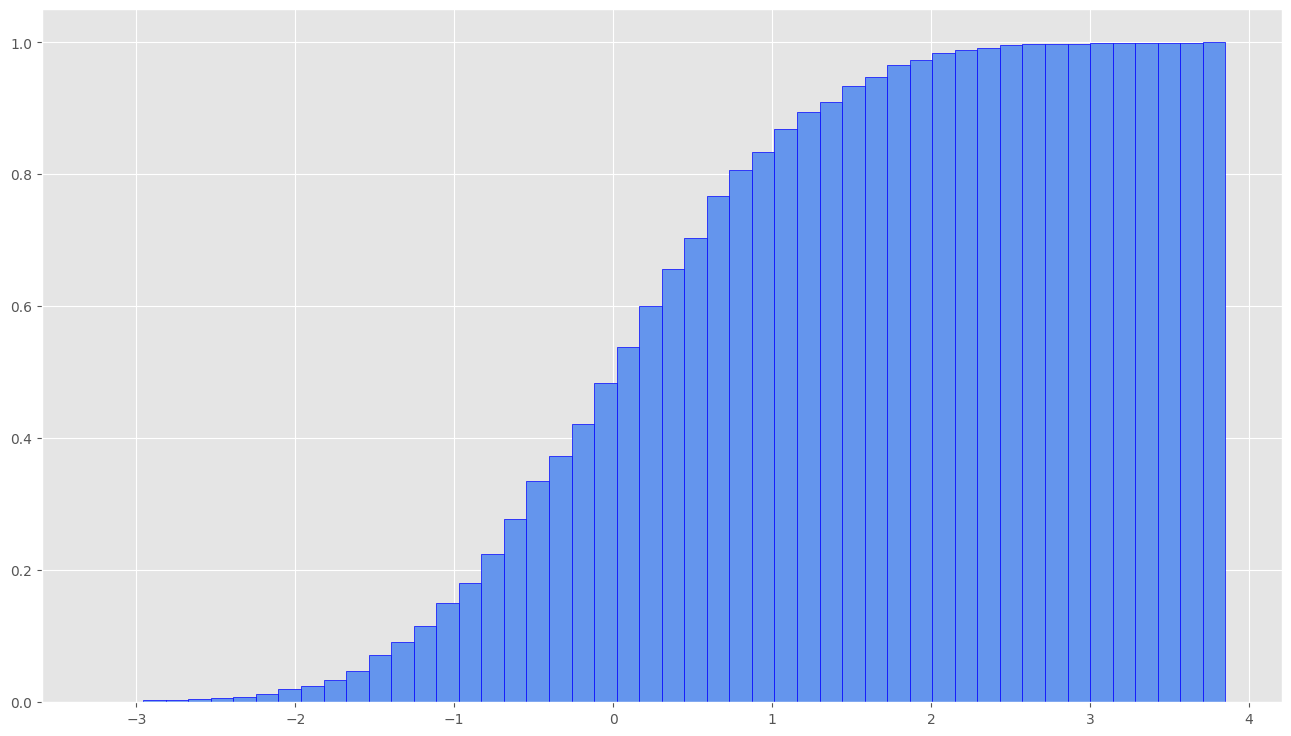

In [21]:
figure, axis = plt.subplots(figsize=(16, 9))

axis.hist(
    data,
    bins=50,
    color="cornflowerblue",
    edgecolor="blue",
    density=True,
    cumulative=True,
)
plt.show()

Также может возникнуть необходимость визуализации нескольких гистограмм одновременно на одних и тех же координатных осях. Однако, в силу особенностей Matplotlib, каждый следующий объект будет отрисован поверх предыдущего и одна гистограмма может перекрыть другу. Чтобы этого избежать мы можем настроить прозрачность гистограммы, используя параметр `alpha`.

Рассмотрим пример. Мы получили некоторые данные о средних суточных температурах в разных регионах, и хотим понять, находятся ли эти географические регионы в одной климатической зоне или нет. Это можно сделать, сравнив рампределения между собой. Обычно такое сравнение стоит начать с простого визуального анализа, поскольку по его результатам можно сделать вывод о целесообразности дальнейших расчетов.

In [22]:
data_hot_climate = np.random.normal(size=1000, loc=0, scale=5)
data_cold_climate = np.random.normal(size=1000, loc=-10, scale=2)
bins_amount = 100

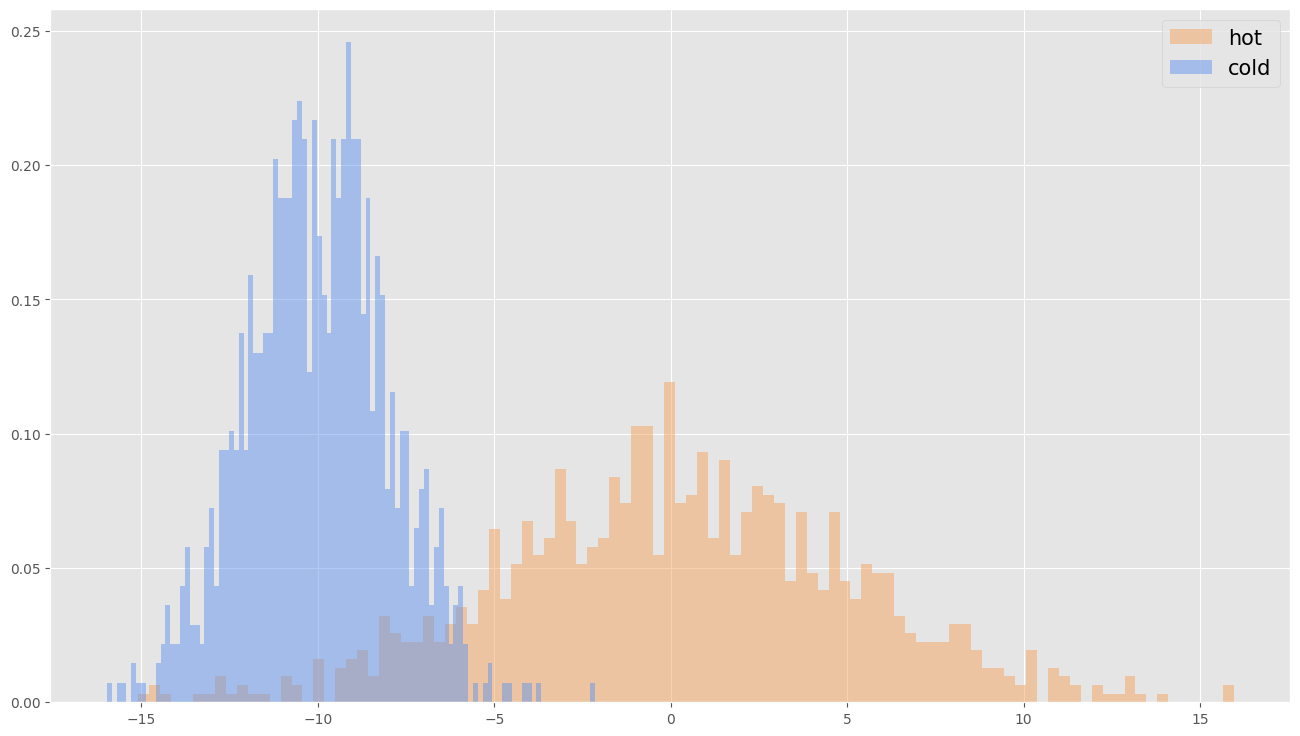

In [23]:
figure, axis = plt.subplots(figsize=(16, 9))

axis.hist(
    data_hot_climate,
    bins=bins_amount,
    color="sandybrown",
    density=True,
    label="hot",
    alpha=0.5,
)
axis.hist(
    data_cold_climate,
    bins=bins_amount,
    color="cornflowerblue",
    density=True,
    label="cold",
    alpha=0.5,
)
axis.legend(fontsize=15)

plt.show()

Как видим, гистограммы сильно отличаются друг от друга.

### plt.boxplot

Гистограмма может много сказать нам о распределении данных. Однако из гистограммы тяжело извлечь данные о квартилях, медиане и выбросах. Иначе говоря, гистограмма не очень хорошо справляется с исчерпывающим описанием выборки. Гораздо лучше с этой функцией может справиться диаграмма boxplot, или как ее называют в русскоязычной литературе, "диаграмма с усиками". Выглядит она следующим образом:

In [14]:
data = np.random.normal(size=1000)

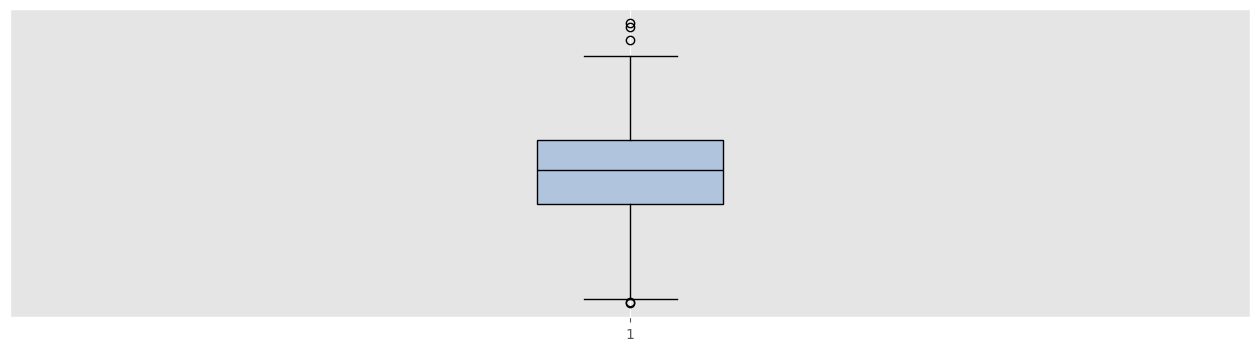

In [20]:
figure, axis = plt.subplots(figsize=(16, 4))

axis.boxplot(
    data,
    vert=True,
    patch_artist=True,
    boxprops=dict(facecolor="lightsteelblue"),
    medianprops=dict(color="k"),
)
axis.set_yticks([])
plt.show()

Boxplot стоит читать следующим образом:

- В самом прямоугольники находится 50% всей выборки, значения попавшие в бокс лежат в диапазоне между 1 и 3 квартилью;
- Черная вертикальная полоса в боксе - это медиана;
- Усики - это коридор допустимых значений, который простирается на разницу третий и первой квартили вправо и на ту же разниу влево;
- Точками обозначены выбросы, т.е. те значения данных, которые потенциально могут давать неточность в наших дальнейших вычислениях.

Подробнее со всеми настройками `boxplot` можно ознакомиться [здесь](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html). Прочитать про саму диаграмму с усиками и правила ее построения можно [тут](https://en.wikipedia.org/wiki/Box_plot).

### plt.violinplot

Еще один достаточно информативный вид диаграмм - это скрипичная диаграмма. Она является своего рода комбинацией boxplot-диаграммы и шистограммы. Подобно диаграмме с усиками скрипичная диаграмма позволяет отобразить некоторые численные характеристики выборки, например, медиану, и подобно гистограмме скрипичная диаграмма позволяет отобразить форму статистического распределения данных. Рассмотрим пример построения данной диаграммы.

In [4]:
data = np.random.normal(size=1000)

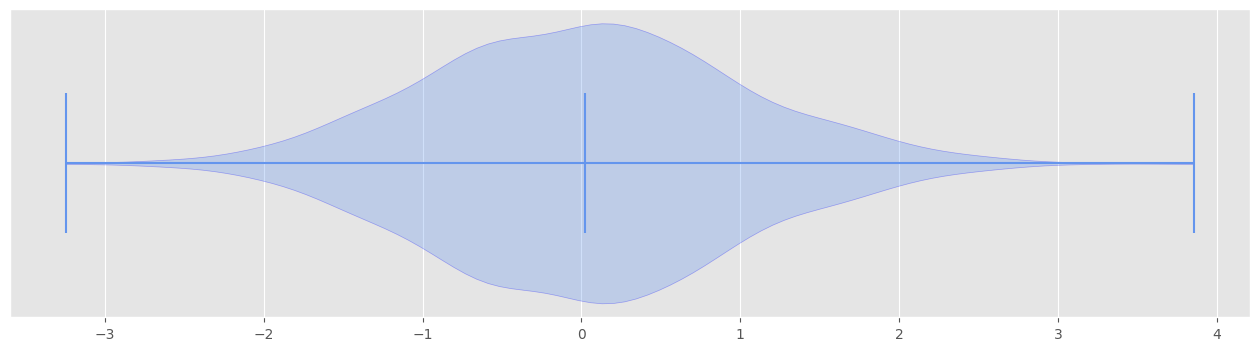

In [9]:
figure, axis = plt.subplots(figsize=(16, 4))

violin_parts = axis.violinplot(
    data,
    vert=False,
    showmedians=True,
)

for body in violin_parts["bodies"]:
    body.set_facecolor("cornflowerblue")
    body.set_edgecolor("blue")

for part in violin_parts:
    if part == "bodies":
        continue

    violin_parts[part].set_edgecolor("cornflowerblue")

axis.set_yticks([])
plt.show()

## Сложные конфигурации множественных графиков.

На прошлом занятии мы рассмотрели функцию `plt.subplots` для получения сетки координатных осей и построения нескольких графиков одновременно. `subplots` является полезной функцией, однако обладает одним недостатком - все координатные оси, полученные с помощью `subplots` имеют одинаковые размеры. В большинстве задача этого достаточно. Однако есть ряд задач, в которых мы бы хотели иметь координатные оси, связанные с одной фигурой, но имеющие разный размер.

Например это может быть полезно для построения нескольких типов диаграмм: диаграммы рассеяния, как основной формы визуализации данных, и гистограмм, как сопроводительные графики распределения данных вдоль осей. В этом случае справится с поставленной задачей нам может помочь функция `plt.GridSpec`, которая создает промежуточный объект для создания неравных по форме координатных осей. Расмотрим пример.

In [11]:
mean = [2, 3]
cov = [[1, 1], [1, 2]]
space = 0.2

abscissa, ordinates = np.random.multivariate_normal(mean, cov, size=1000).T

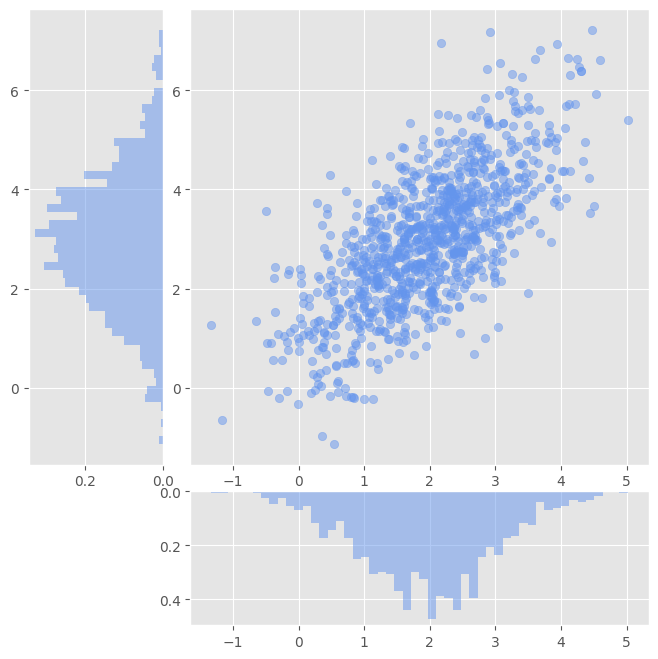

In [19]:
figure = plt.figure(figsize=(8, 8))
grid = plt.GridSpec(4, 4, wspace=space, hspace=space)

axis_scatter = figure.add_subplot(grid[:-1, 1:])
axis_hist_vert = figure.add_subplot(
    grid[:-1, 0],
    sharey=axis_scatter,
)
axis_hist_hor = figure.add_subplot(
    grid[-1, 1:],
    sharex=axis_scatter,
)

axis_scatter.scatter(abscissa, ordinates, color="cornflowerblue", alpha=0.5)
axis_hist_hor.hist(
    abscissa,
    bins=50,
    color="cornflowerblue",
    density=True,
    alpha=0.5,
)
axis_hist_vert.hist(
    ordinates,
    bins=50,
    color="cornflowerblue",
    orientation="horizontal",
    density=True,
    alpha=0.5,
)

axis_hist_hor.invert_yaxis()
axis_hist_vert.invert_xaxis()

plt.show()

## Задание 2

Взяв за основу код предыдущего примера и код построения диаграммы с усиками и скрипичной диаграммы, реализуйте функцию `visualize_diagrams`. На вход функции подаются массивы абсцисс и ординат точек, а также тип диаграмм, которые должны быть использованы для построения распределений данных вдоль определенных координатных осей. Доступные значений: `hist`, `violin`, `box`. В результате использования функции должна получаться иллюстрация на подобие визуализации из прошлого примера.

При реализации функции будут оцениваться принятые инденерные решения, возможность переиспользования написанных функций, а также следование принципу DRY.

**Решение:**

In [30]:
from typing import Any

In [31]:
def visualize_diagrams(
    abscissa: np.ndarray,
    ordinates: np.ndarray,
    diagram_type: Any,
) -> None:
    # ваш код
    pass

**Тесты:**

In [32]:
mean = [2, 3]
cov = [[1, 1], [1, 2]]
space = 0.2

abscissa, ordinates = np.random.multivariate_normal(mean, cov, size=1000).T

In [33]:
visualize_diagrams(abscissa, ordinates, "hist")

## Дополнительные материалы:
- [Построение donut-диаграмм с помощью plt.pie](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py);
- [Построение вложенных круговых диаграмм](https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html#sphx-glr-gallery-pie-and-polar-charts-nested-pie-py);
- [Двумерные гистограммы](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html);
- [Двумерные гистограммы в форме правильных шестиугольников](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hexbin.html);